In [1]:
from glob import glob
import pandas as pd
import numpy as np
import folium
from urllib.request import urlopen #특정 url을 불러옴
import json
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'

<AxesSubplot:title={'center':'한글'}>

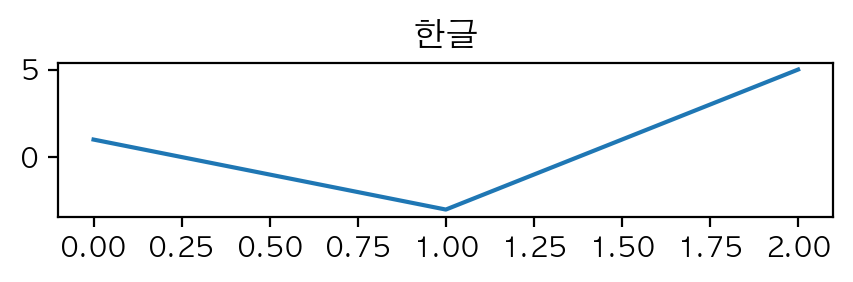

In [3]:
pd.Series([1, -3, 5]).plot(title="한글", figsize=(5, 1))

## 커피지수

In [4]:
cf = pd.read_excel('seoul_coffee_ratio.xlsx')
cf = cf.drop(9)
cf

,시군구명,커피지수
0,강남구,0.832
1,서초구,0.826
2,중구,0.814
3,용산구,0.799
4,종로구,0.780
5,영등포구,0.723
6,마포구,0.699
7,송파구,0.691
8,서대문구,0.669
10,광진구,0.641


In [5]:
cf_barh = cf.sort_values('커피지수')
cf_barh.head()

,시군구명,커피지수
25,도봉구,0.519
24,성북구,0.552
23,중랑구,0.554
22,은평구,0.554
21,강북구,0.559


### 그래프

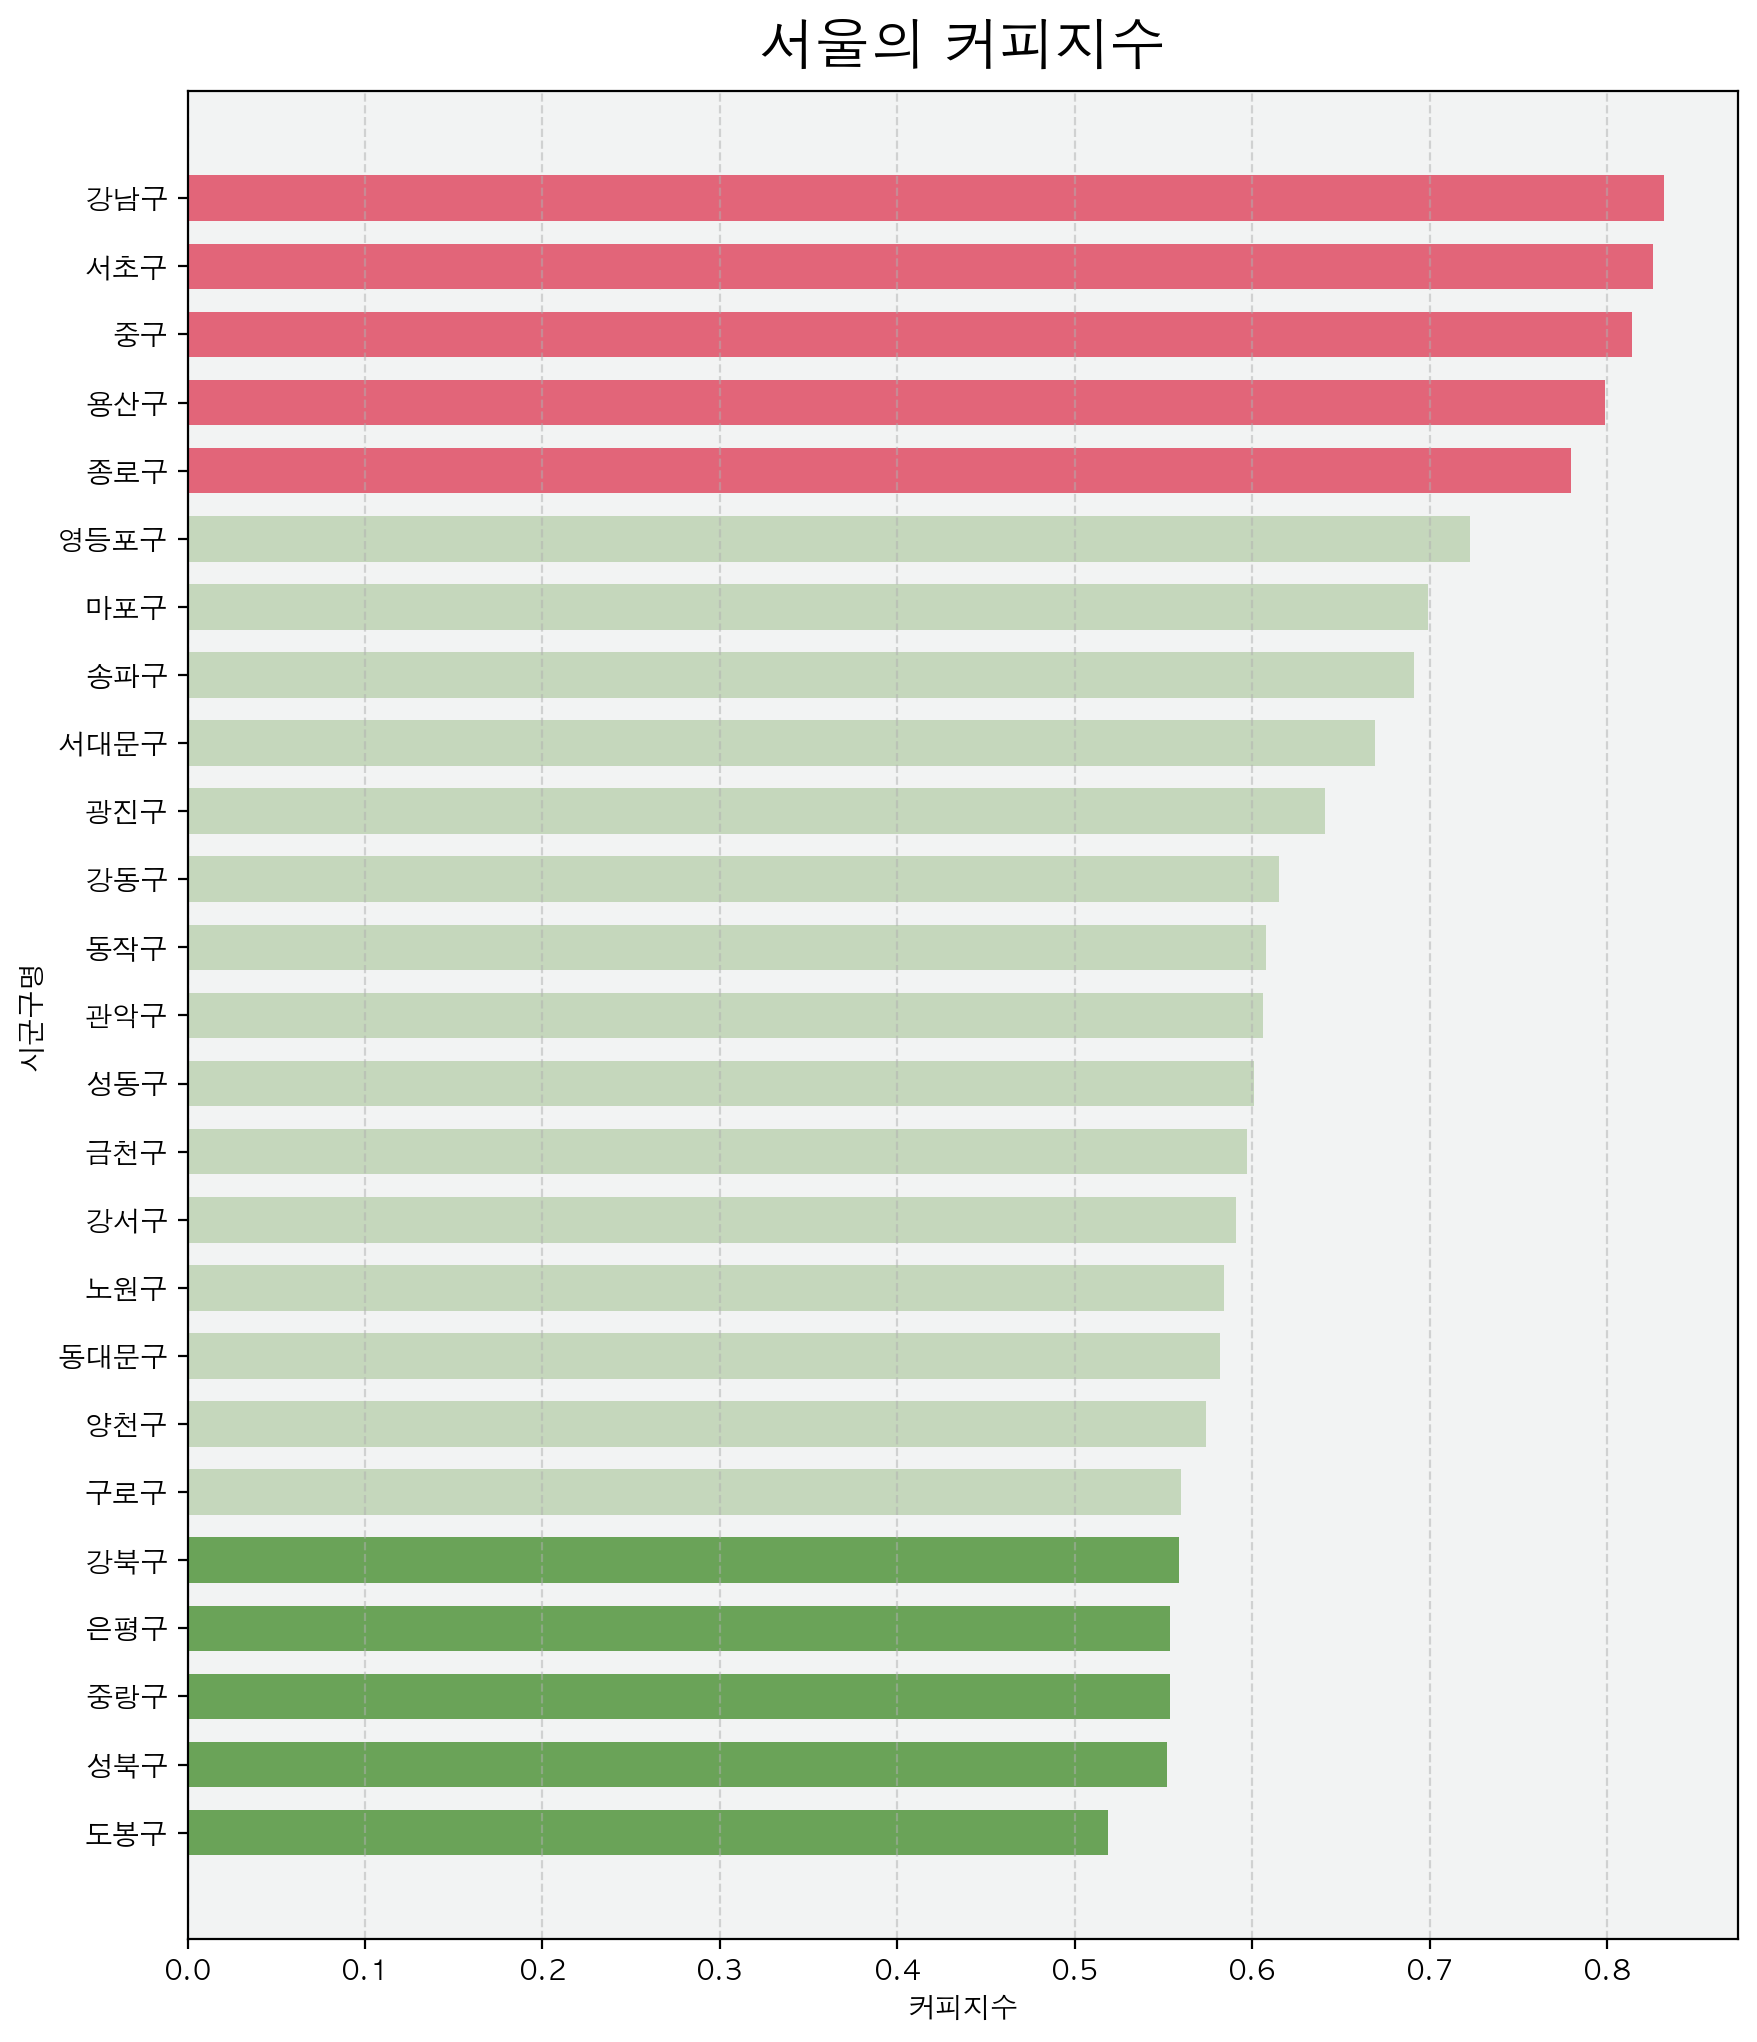

In [6]:
#barh
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#488f31', '#488f31', '#488f31', '#488f31', '#488f31','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#de425b','#de425b','#de425b','#de425b','#de425b']
plt.barh(cf_barh['시군구명'], cf_barh['커피지수'], color=colors, alpha=0.8, height=0.67)

plt.xlabel("커피지수")
plt.ylabel("시군구명")
plt.title('서울의 커피지수', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='x', alpha=0.5, linestyle='--')
plt.show()

In [7]:
colors = ['#bad0af' for i in range(15)]
colors

['#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af']

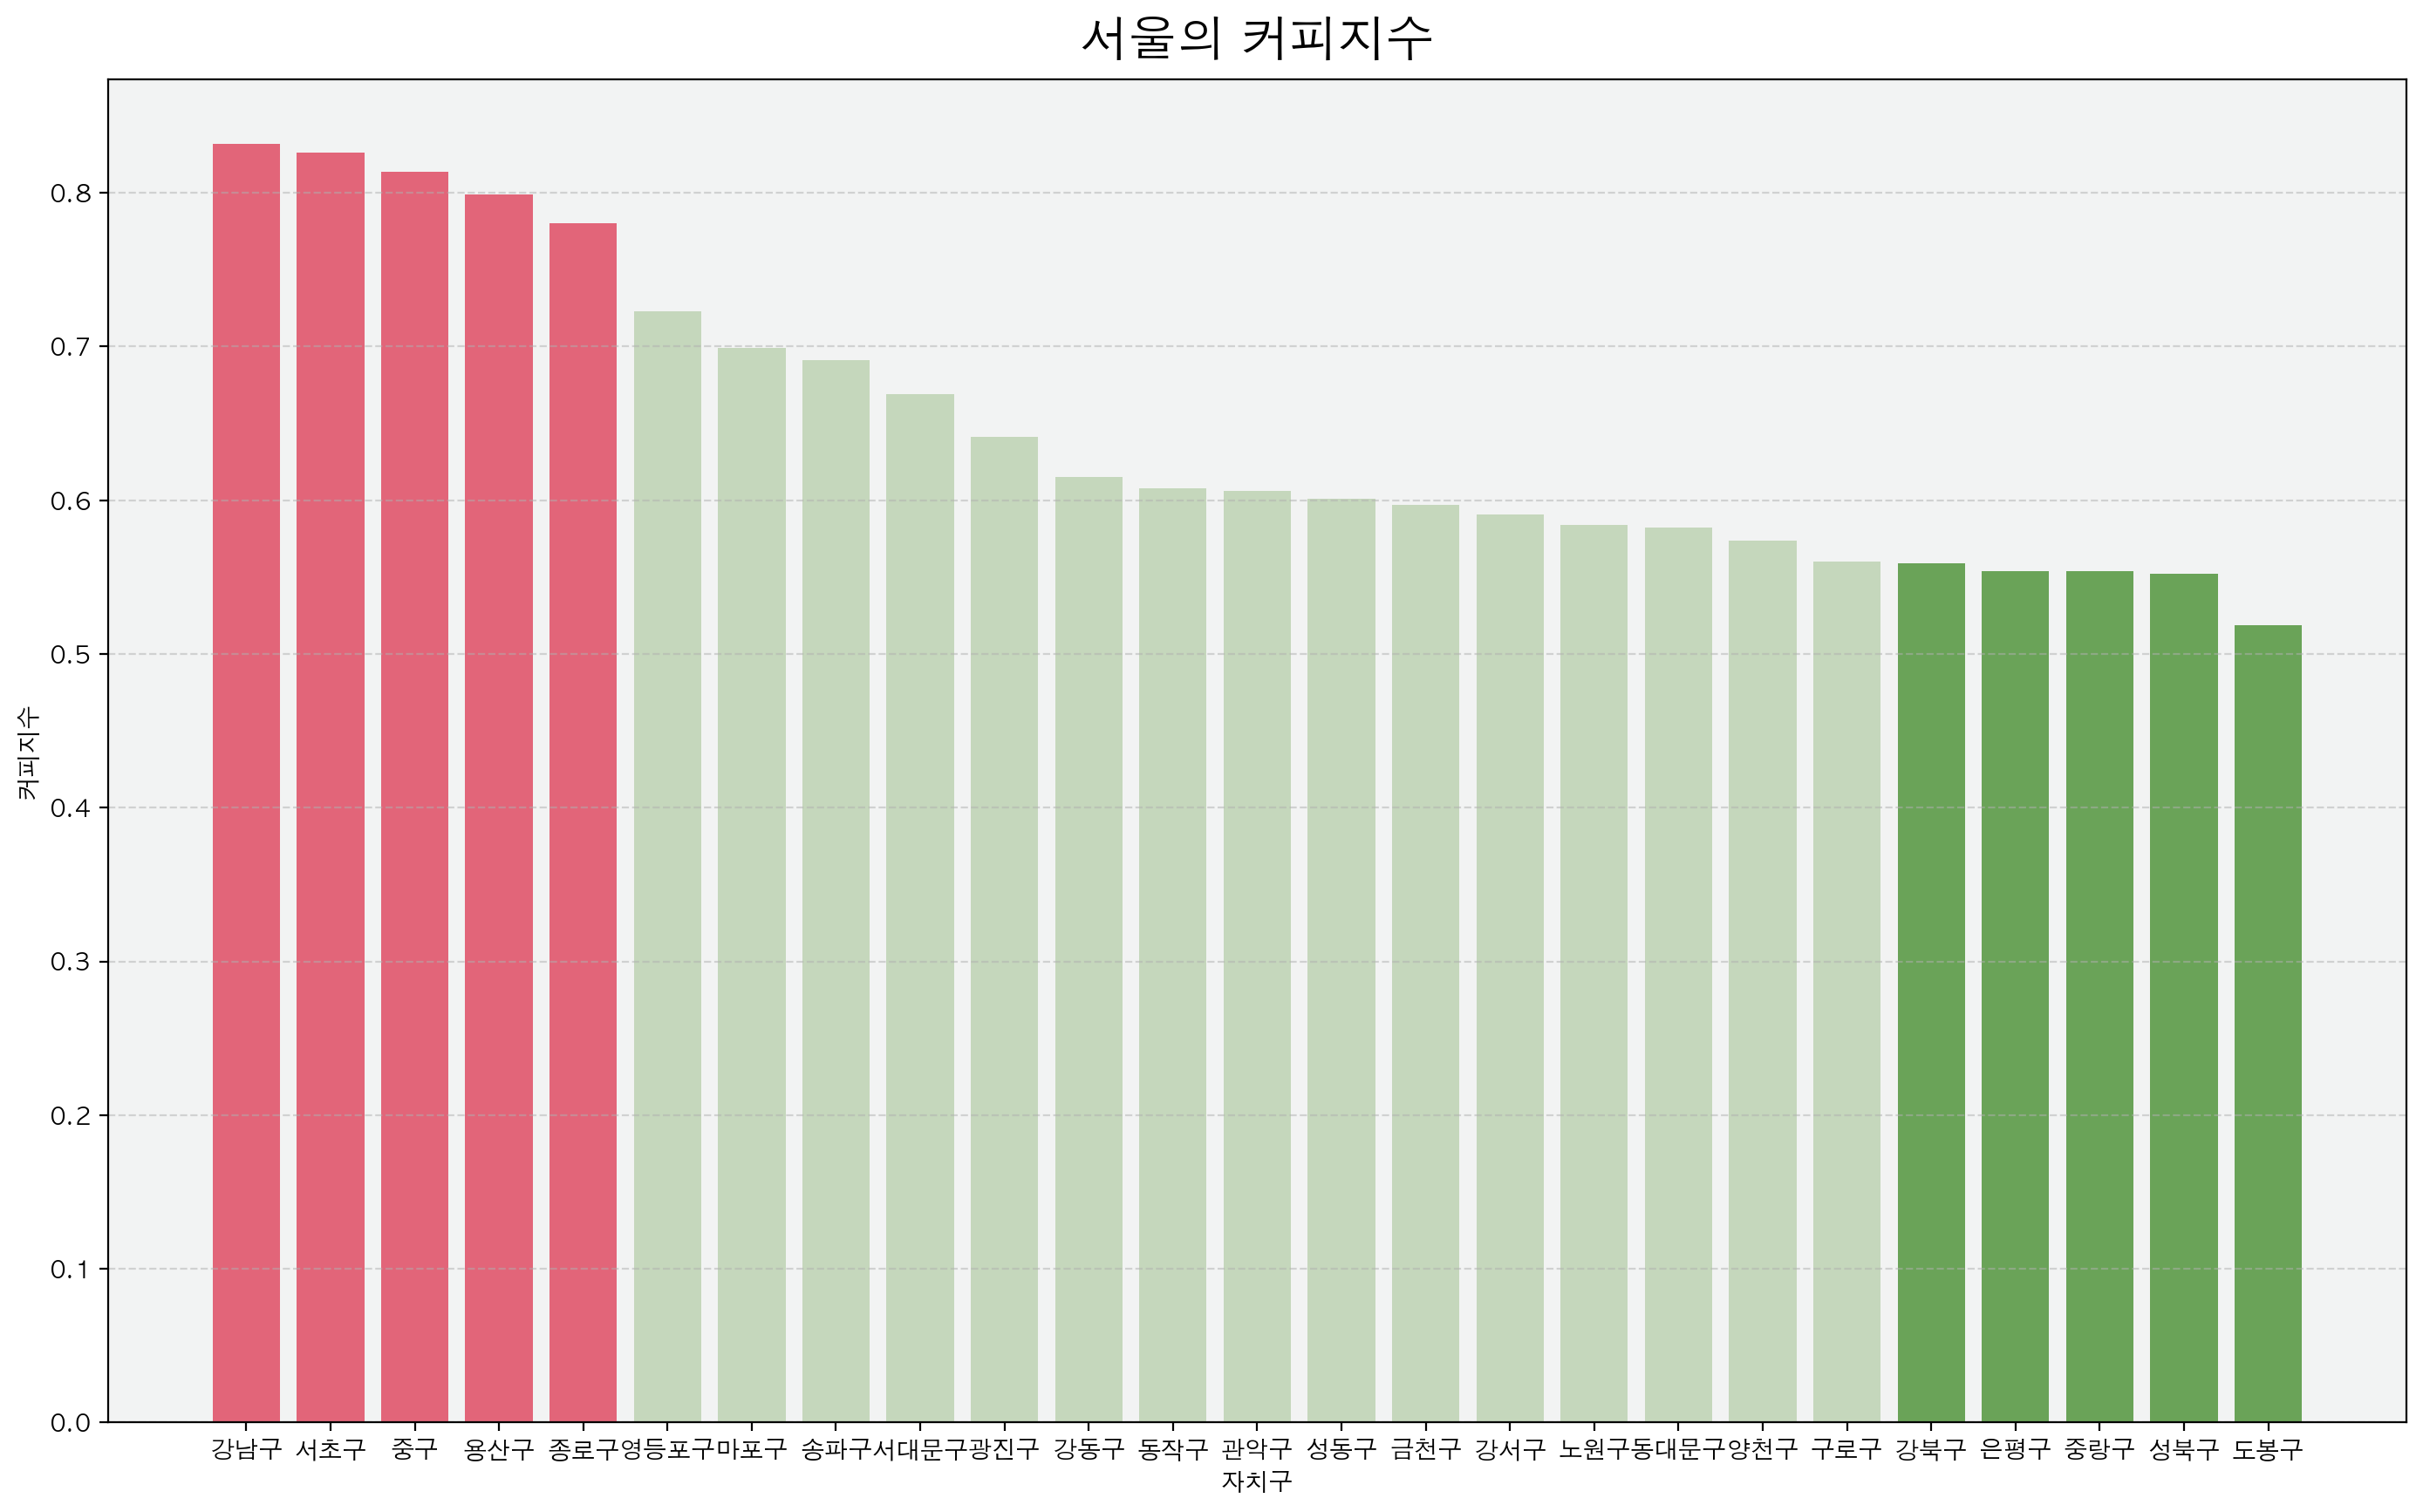

In [8]:
#bar
#color='#de425b'
#color='#488f31'
#color='#bad0af'
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#de425b','#de425b','#de425b','#de425b','#de425b','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#488f31', '#488f31', '#488f31', '#488f31', '#488f31']
plt.bar(cf['시군구명'], cf['커피지수'], color=colors, alpha=0.8)

plt.xlabel("자치구")
plt.ylabel("커피지수")
plt.title('서울의 커피지수', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

## 부가가치

In [9]:
va = pd.read_csv('seoul_VA_5years.csv')
va.columns = ['시군구명', '2020', '2019', '2018', '2017', '2016']
va['2020'] = va['2020'].str.replace(",", "").astype('int')
va['2019'] = va['2019'].str.replace(",", "").astype('int')
va['2018'] = va['2018'].str.replace(",", "").astype('int')
va['2017'] = va['2017'].str.replace(",", "").astype('int')
va['2016'] = va['2016'].str.replace(",", "").astype('int')
va = va.loc[1:]
va

,시군구명,2020,2019,2018,2017,2016
1,종로구,30006285,30808612,28813966,28597810,27557346
2,중구,49217070,48960286,48713496,46311293,47766901
3,용산구,11729287,11652457,11258567,10738075,9632663
4,성동구,11272209,11101959,10652839,9819340,9780132
5,광진구,5959124,6099745,5870178,5662708,5647054
6,동대문구,6767289,359582,6719840,6612208,6609557
7,중랑구,4367195,4366141,4102403,3938464,3803053
8,성북구,5772190,5742356,5655401,5525404,5382719
9,강북구,3074364,3039338,2958494,2817683,2726714
10,도봉구,3231378,3158453,3106159,3071379,2880584


In [10]:
va_2020 = va.iloc[: , :2]
va_2020 = va_2020.sort_values('2020', ascending=False)
va_2020.columns = ['시군구명', '총부가가치']
va_2020.head()

,시군구명,총부가가치
23,강남구,67336899
2,중구,49217070
19,영등포구,34464003
22,서초구,33237223
1,종로구,30006285


In [11]:
va_barh = va_2020.sort_values('총부가가치')
va_barh.head()

,시군구명,총부가가치
9,강북구,3074364
10,도봉구,3231378
7,중랑구,4367195
12,은평구,4681499
21,관악구,5714406


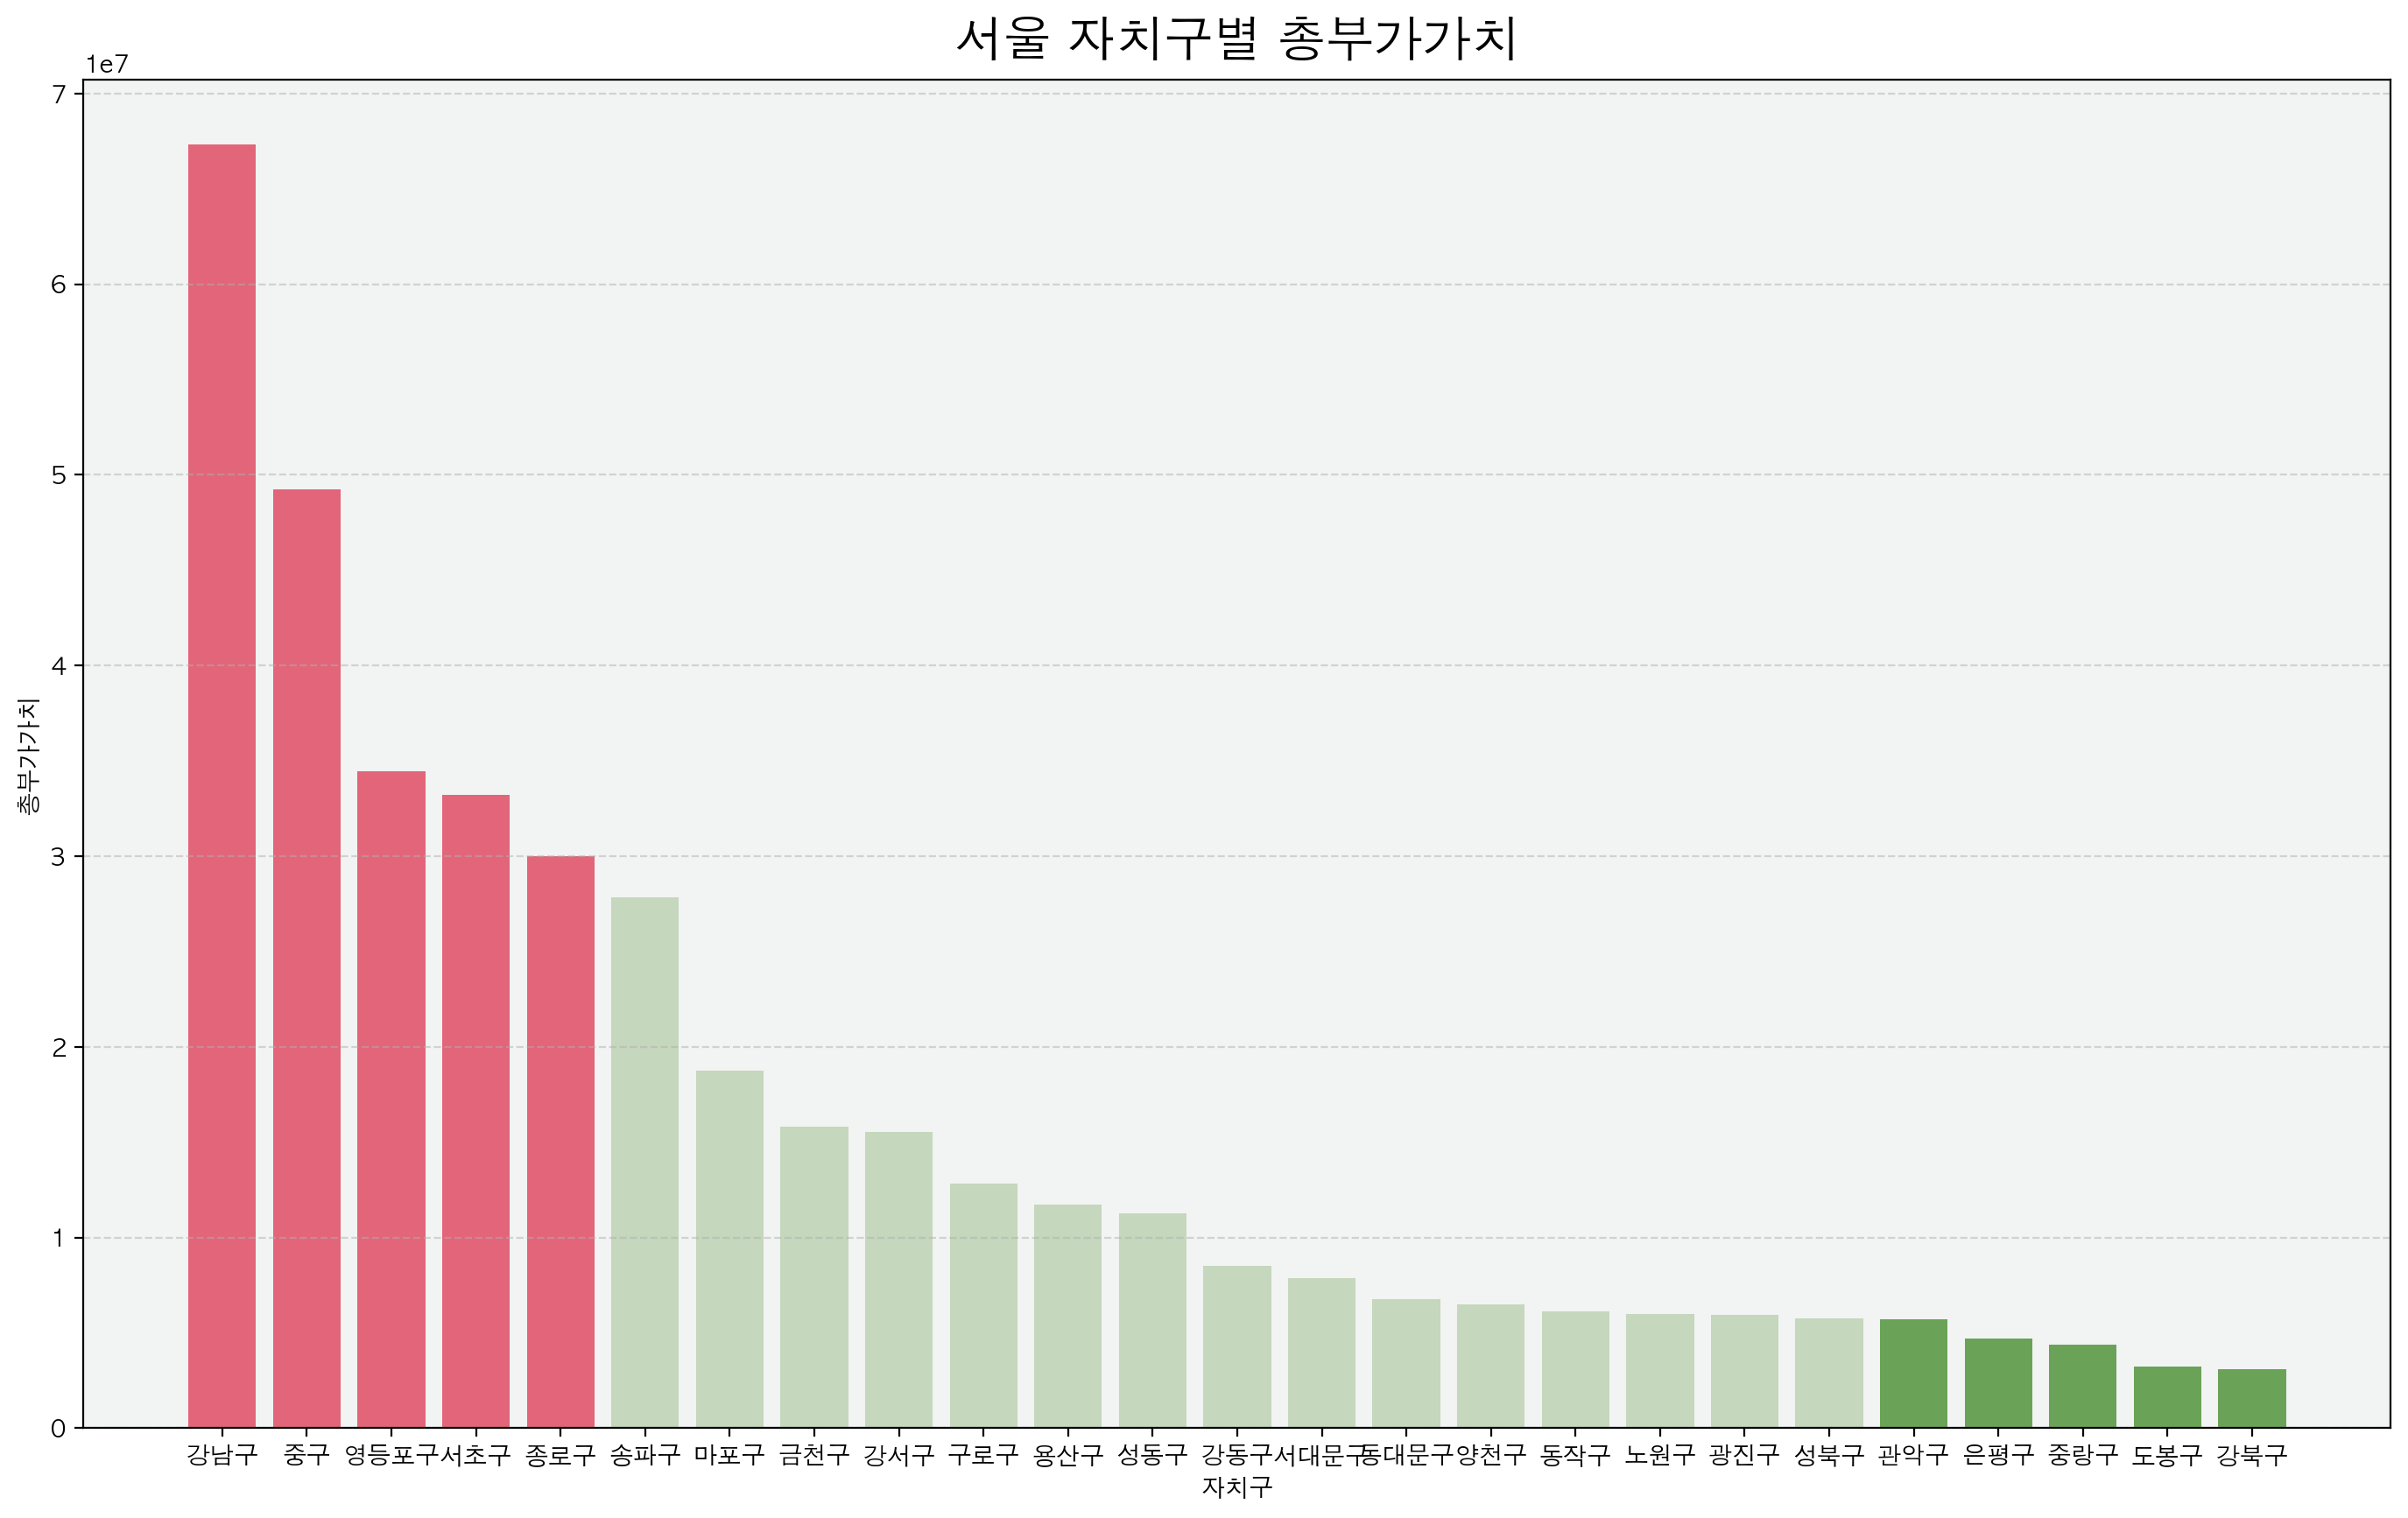

In [12]:
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#de425b','#de425b','#de425b','#de425b','#de425b','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#488f31', '#488f31', '#488f31', '#488f31', '#488f31']
plt.bar(va_2020['시군구명'], va_2020['총부가가치'], color=colors, alpha=0.8)

plt.xlabel("자치구")
plt.ylabel("총부가가치")
plt.title('서울 자치구별 총부가가치', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

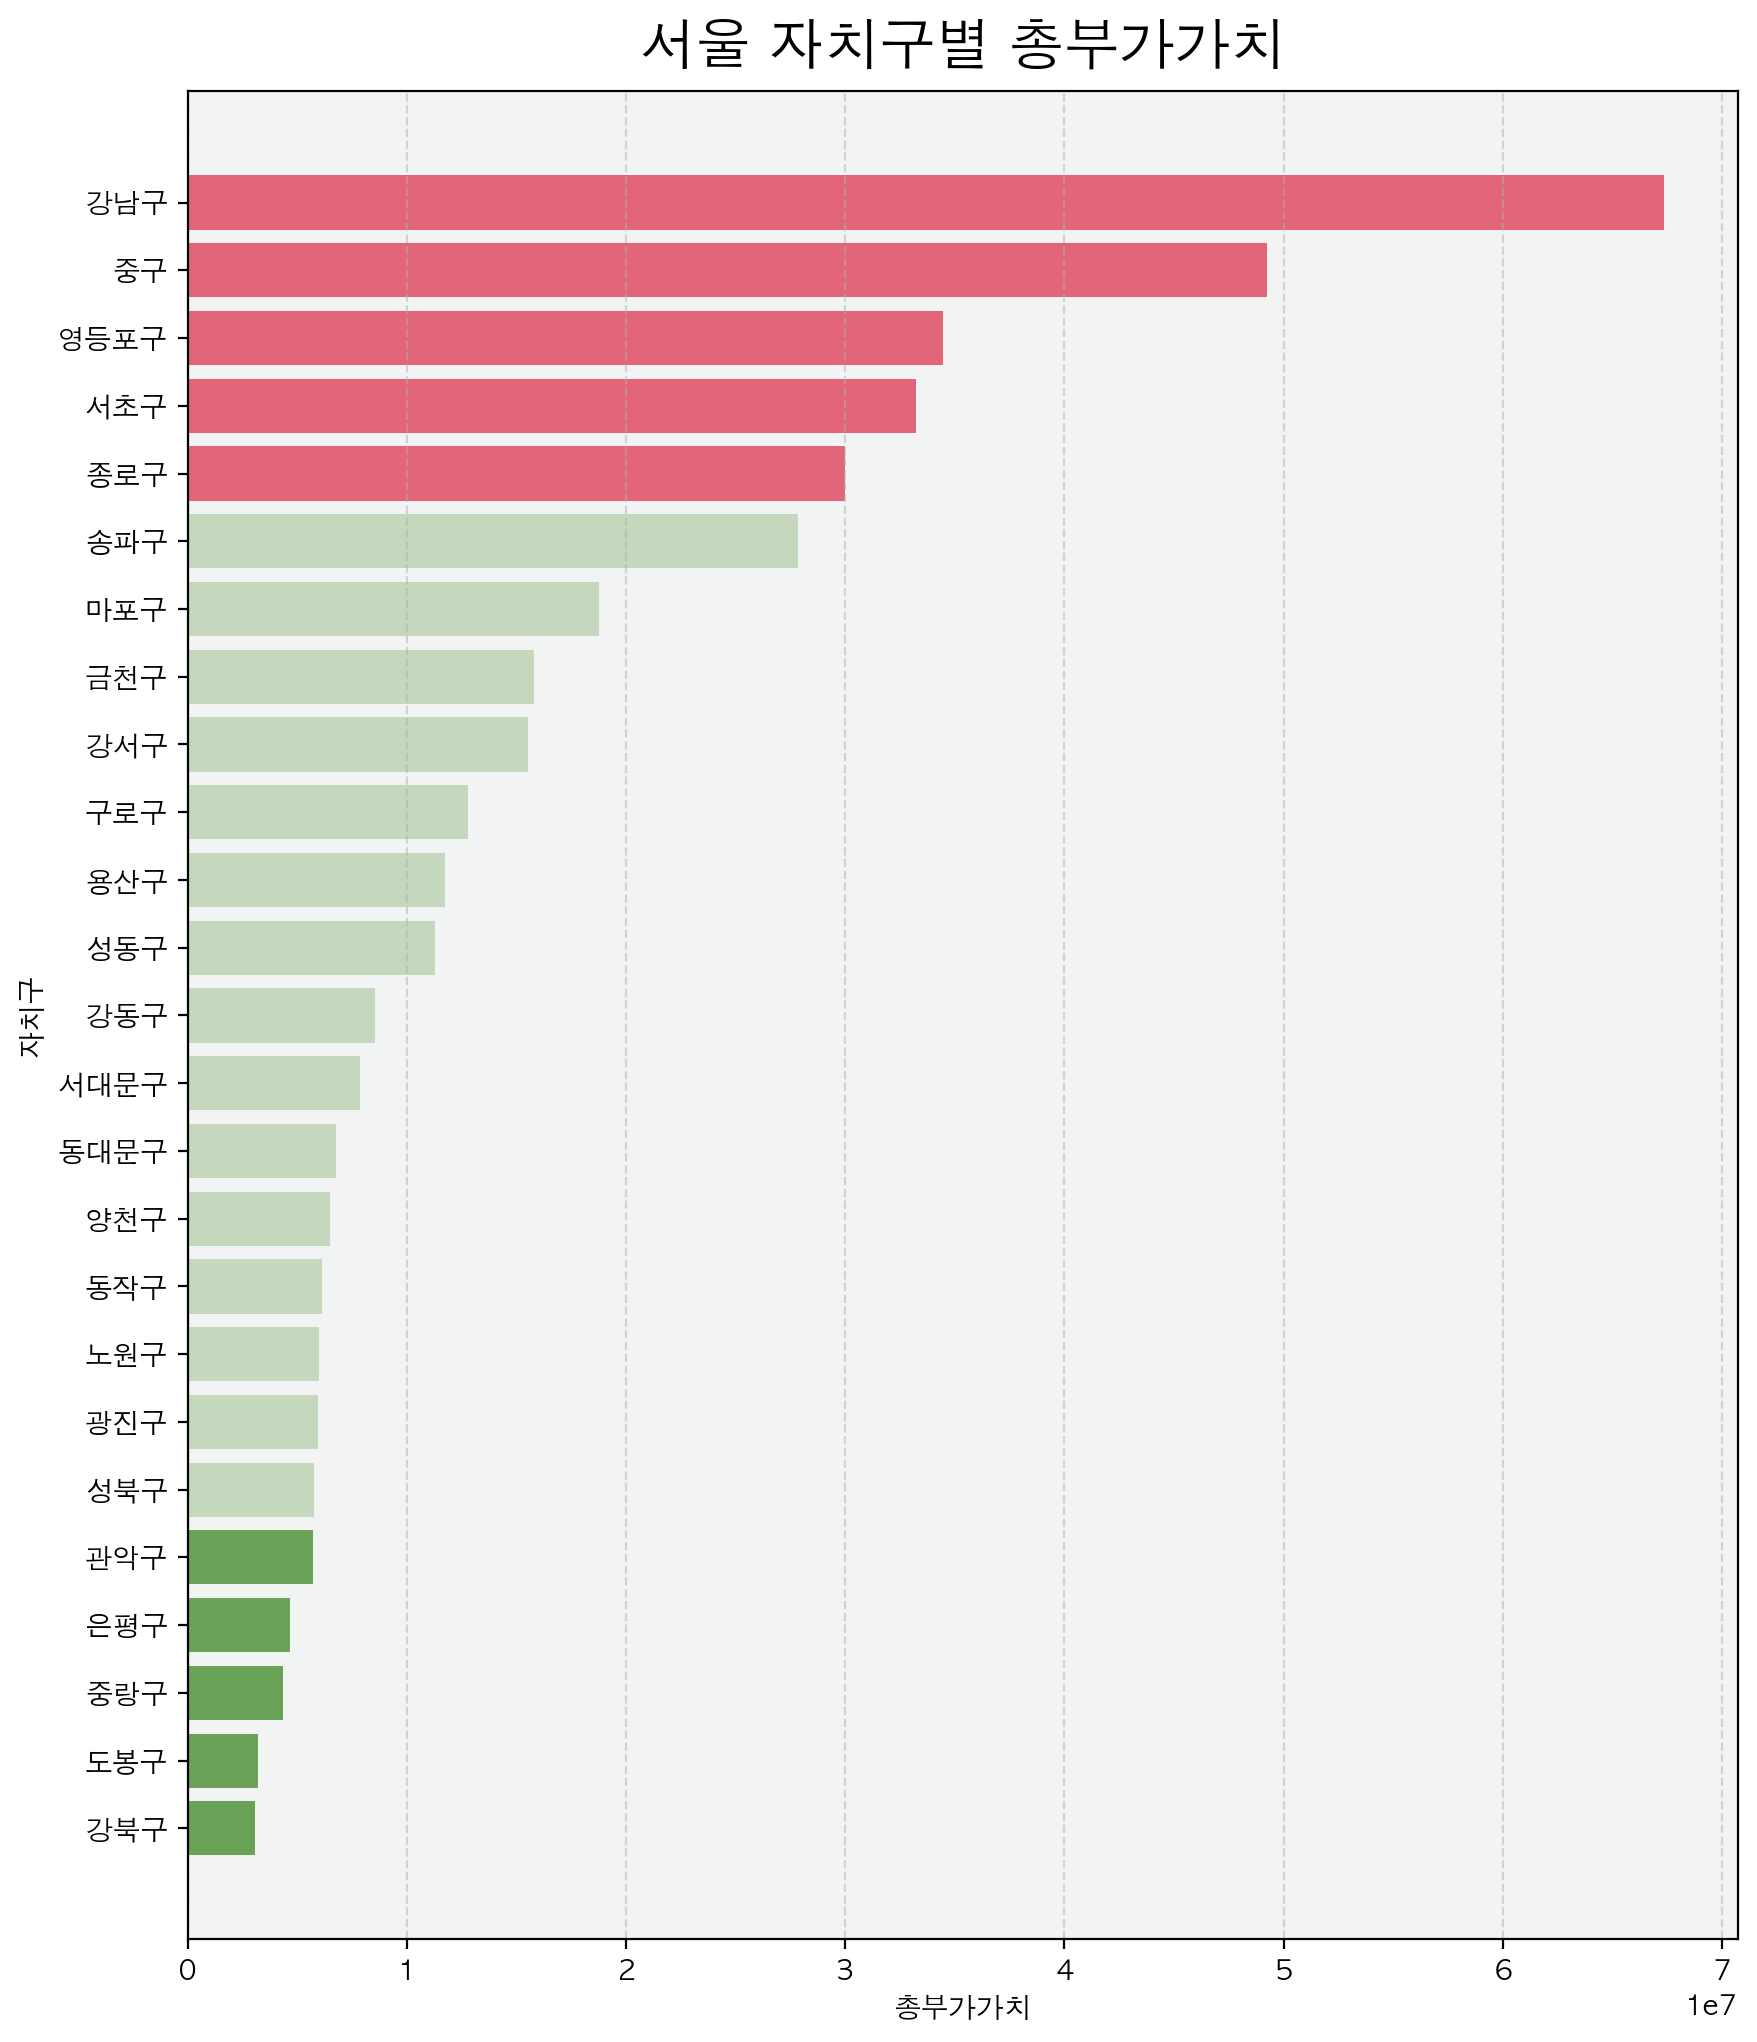

In [13]:
#barh
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#488f31', '#488f31', '#488f31', '#488f31', '#488f31','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#de425b','#de425b','#de425b','#de425b','#de425b']
plt.barh(va_barh['시군구명'], va_barh['총부가가치'], color=colors, alpha=0.8)

plt.xlabel("총부가가치")
plt.ylabel("자치구")
plt.title('서울 자치구별 총부가가치', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='x', alpha=0.5, linestyle='--')
plt.show()

In [14]:
merged_df = pd.merge(cf, va_2020, how='inner', on='시군구명')
merged_df

,시군구명,커피지수,총부가가치
0,강남구,0.832,67336899
1,서초구,0.826,33237223
2,중구,0.814,49217070
3,용산구,0.799,11729287
4,종로구,0.780,30006285
5,영등포구,0.723,34464003
6,마포구,0.699,18770337
7,송파구,0.691,27853859
8,서대문구,0.669,7857484
9,광진구,0.641,5959124


In [15]:
merged_df.corr()

,커피지수,총부가가치
커피지수,1.000000,0.815374
총부가가치,0.815374,1.000000


In [16]:
merged_df.describe()

,커피지수,총부가가치
count,25.000000,2.500000e+01
mean,0.645200,1.610464e+07
std,0.097751,1.603715e+07
min,0.519000,3.074364e+06
25%,0.574000,5.959124e+06
50%,0.606000,8.528269e+06
75%,0.699000,1.877034e+07
max,0.832000,6.733690e+07


## 재정자립도

In [17]:
tx = pd.read_excel('seoul_tax.xlsx')
tx = tx.loc[2:]
tx.columns = ['시도명','시군구명','재정자립도(세입과목개편전)','재정자립도(세입과목개편후)']
tx = tx.iloc[:, 1:]
tx.head()

/Users/kmr/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시군구명,재정자립도(세입과목개편전),재정자립도(세입과목개편후)
2,강남구,69.4,58.9
3,중구,65.6,55.3
4,서초구,63.5,57.8
5,종로구,51.2,47.5
6,용산구,47.7,41.9


In [18]:
mg_2 = pd.merge(merged_df, tx, how='inner', on='시군구명')
mg_2['재정자립도(세입과목개편전)'] = mg_2['재정자립도(세입과목개편전)'].astype('float')
mg_2['재정자립도(세입과목개편후)'] = mg_2['재정자립도(세입과목개편전)'].astype('float')
mg_2

,시군구명,커피지수,총부가가치,재정자립도(세입과목개편전),재정자립도(세입과목개편후)
0,강남구,0.832,67336899,69.4,69.4
1,서초구,0.826,33237223,63.5,63.5
2,중구,0.814,49217070,65.6,65.6
3,용산구,0.799,11729287,47.7,47.7
4,종로구,0.780,30006285,51.2,51.2
5,영등포구,0.723,34464003,42.9,42.9
6,마포구,0.699,18770337,38.3,38.3
7,송파구,0.691,27853859,46.9,46.9
8,서대문구,0.669,7857484,31.7,31.7
9,광진구,0.641,5959124,34.0,34.0


In [19]:
mg_2.describe()

,커피지수,총부가가치,재정자립도(세입과목개편전),재정자립도(세입과목개편후)
count,25.000000,2.500000e+01,25.000000,25.000000
mean,0.645200,1.610464e+07,36.068000,36.068000
std,0.097751,1.603715e+07,14.056366,14.056366
min,0.519000,3.074364e+06,22.000000,22.000000
25%,0.574000,5.959124e+06,26.400000,26.400000
50%,0.606000,8.528269e+06,30.400000,30.400000
75%,0.699000,1.877034e+07,42.900000,42.900000
max,0.832000,6.733690e+07,69.400000,69.400000


In [20]:
ct = mg_2[['커피지수', '재정자립도(세입과목개편후)']]
ct.columns = ['커피지수', '재정자립도']
ct.head()

,커피지수,재정자립도
0,0.832,69.4
1,0.826,63.5
2,0.814,65.6
3,0.799,47.7
4,0.780,51.2


In [21]:
mg_2.columns

Index(['시군구명', '커피지수', '총부가가치', '재정자립도(세입과목개편전)', '재정자립도(세입과목개편후)'], dtype='object')

## 통계 검정

In [22]:
import pingouin as pg
from statsmodels.formula.api import ols

In [23]:
pg.corr(mg_2['커피지수'], mg_2['총부가가치'])

,n,r,CI95%,p-val,BF10,power
pearson,25,0.815374,"[0.62, 0.92]",6.872219e-07,2.708e+04,0.999745


In [24]:
6.872219e-07 < 0.05

True

In [38]:
m = ols('총부가가치 ~ 커피지수', mg_2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총부가가치   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     45.62
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           6.87e-07
Time:                        17:05:41   Log-Likelihood:                -436.06
No. Observations:                  25   AIC:                             876.1
Df Residuals:                      23   BIC:                             878.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.02e+07   1.29e+07     -5.435      0.000   -9.69e+07   -4.35e+07
커피지수        1.338e+08   1.98e+07      6.754      0.000    9.28e+07    1.75e+08
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.858
Skew:                           0.124   Prob(JB):                       0.0534
Kurtosis:                       5.358   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
pg.corr(ct['커피지수'], ct['재정자립도'])

,n,r,CI95%,p-val,BF10,power
pearson,25,0.934691,"[0.86, 0.97]",8.155088e-12,7.955e+08,1.0


In [40]:
8.155088e-12 < 0.05

True

In [25]:
m = ols('재정자립도 ~ 커피지수', ct).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재정자립도   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.16e-12
Time:                        16:45:52   Log-Likelihood:                -75.182
No. Observations:                  25   AIC:                             154.4
Df Residuals:                      23   BIC:                             156.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.6514      6.952     -7.286      0.000     -65.033     -36.270
커피지수         134.4070     10.658     12.611      0.000     112.359     156.455
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.435
Skew:                           0.170   Prob(JB):                        0.804
Kurtosis:                       2.450   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

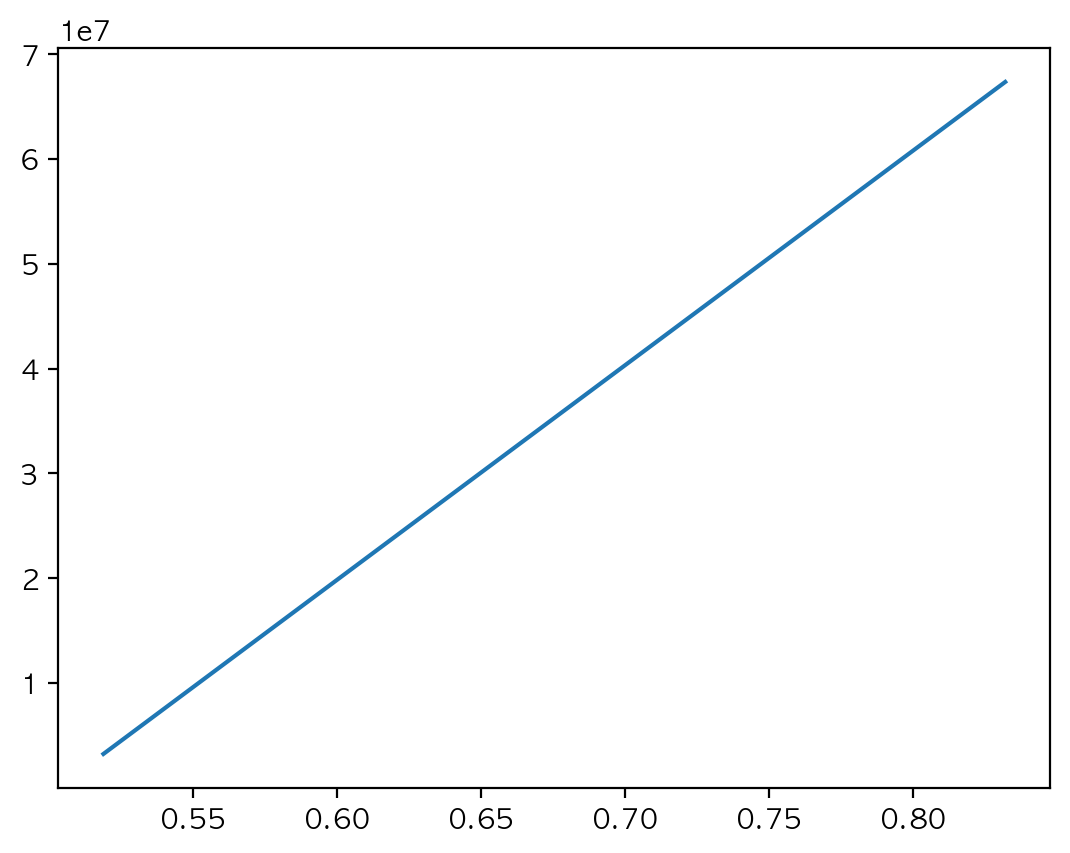

In [26]:
plt.plot([0.519, 0.832], [3231378, 67336899])

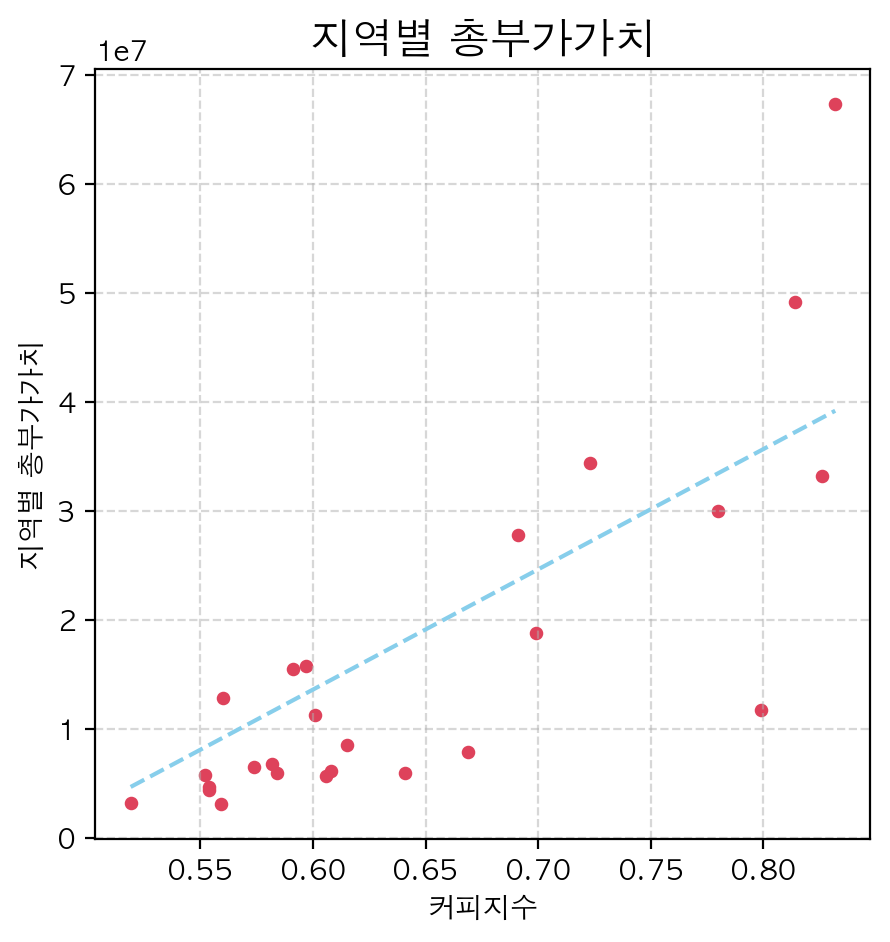

In [28]:
plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

plt.scatter(mg_2['커피지수'], mg_2['총부가가치'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [4681499, 39217070], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("지역별 총부가가치")
plt.title('지역별 총부가가치', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

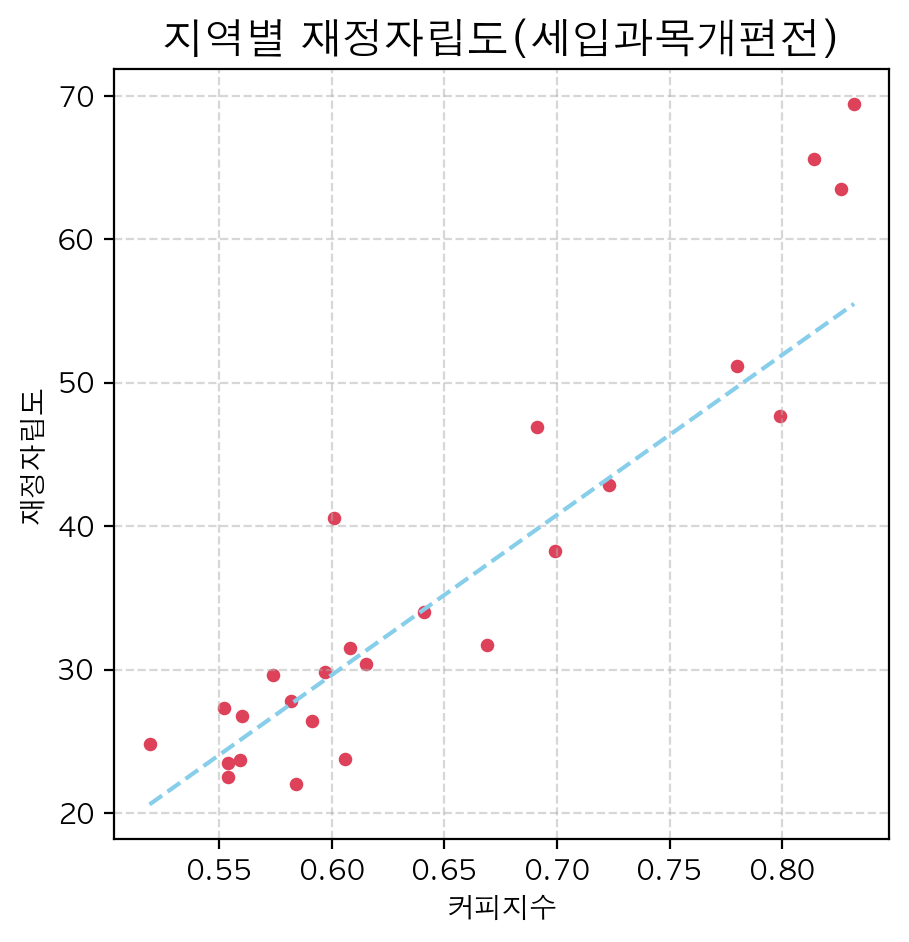

In [31]:
plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편전)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편전)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

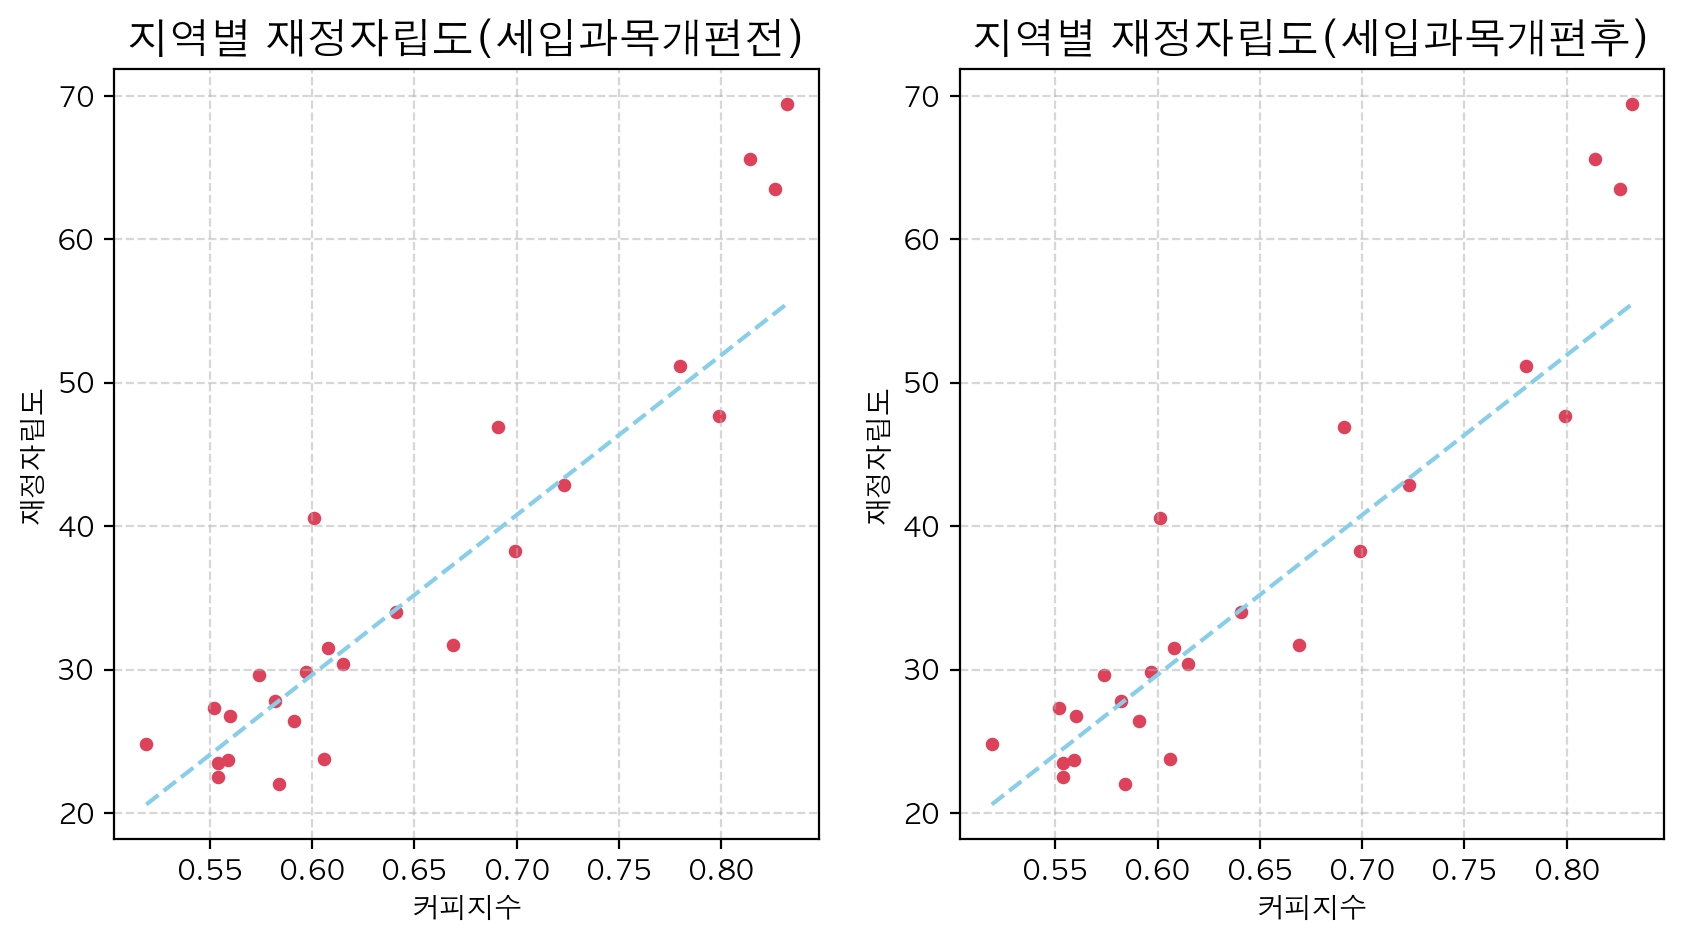

In [36]:
plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

#왼쪽에 그리기
plt.subplot(1, 2, 1) 
plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편전)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편전)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')

#오른쪽에 그리기
plt.subplot(1, 2, 2) 
plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편후)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편후)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')

plt.show()

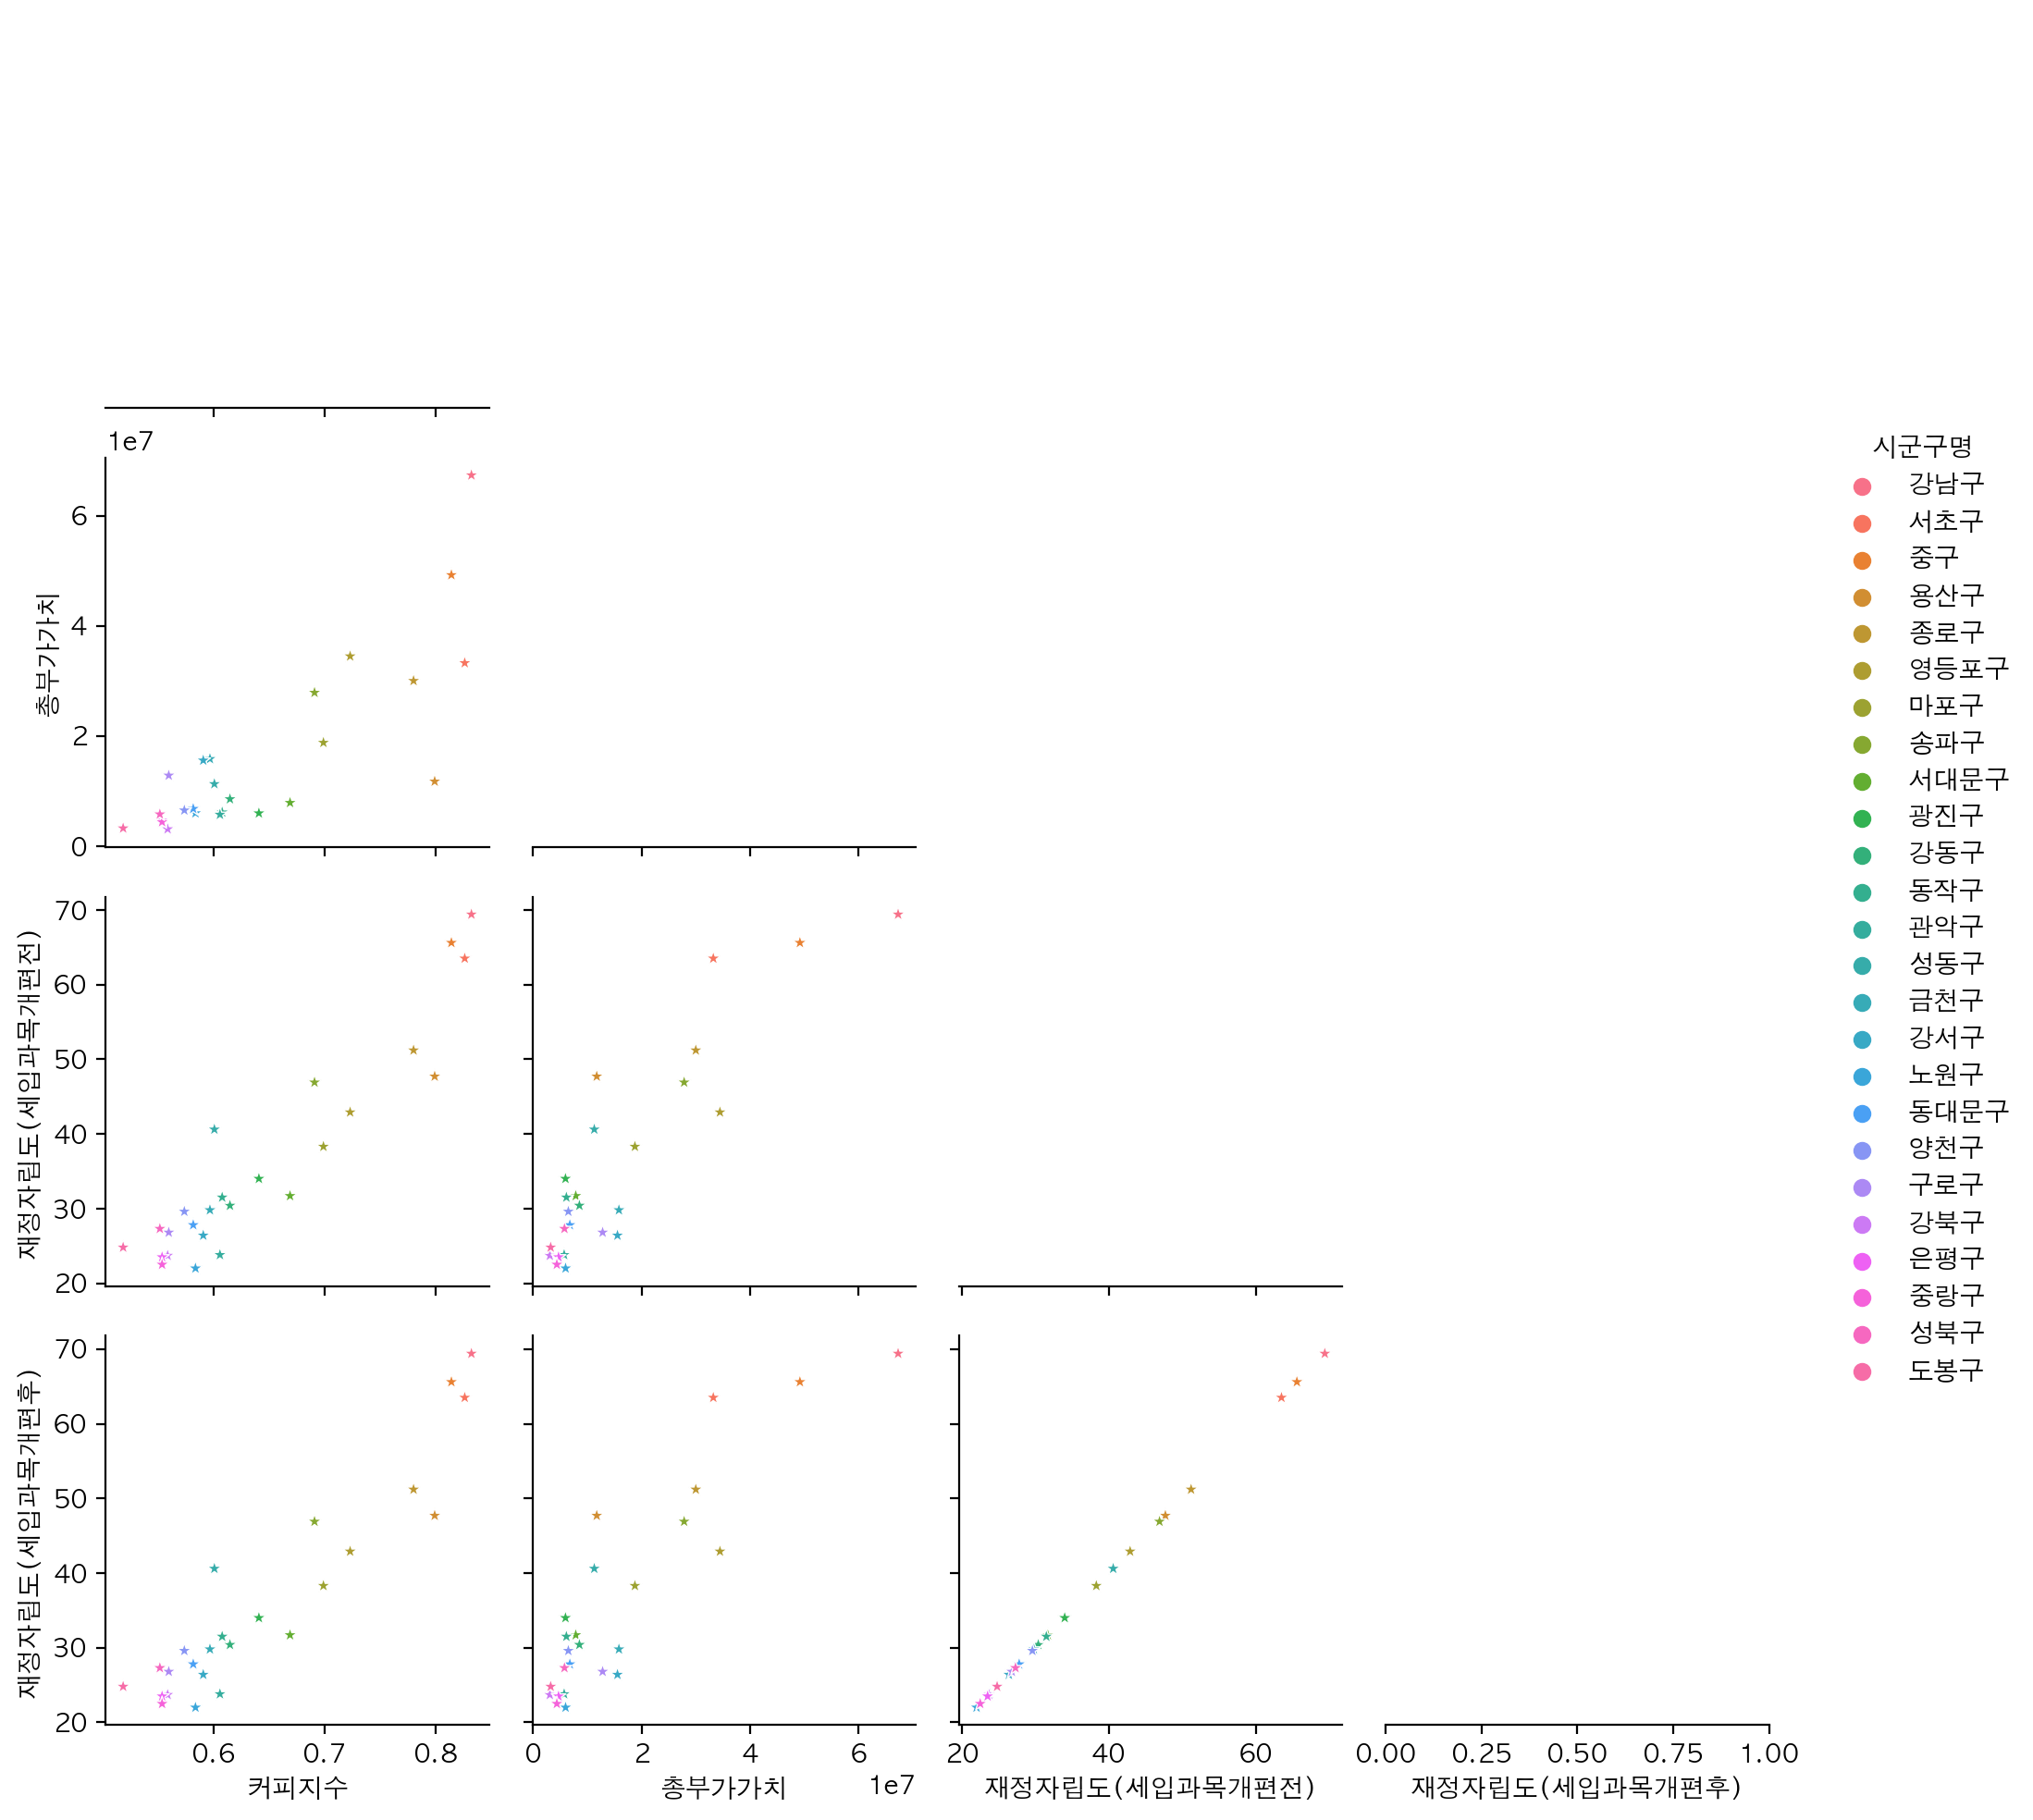

In [47]:
sns.pairplot(data=mg_2, corner=True, hue='시군구명', markers='*');

In [48]:
mg_2.corr()

,커피지수,총부가가치,재정자립도(세입과목개편전),재정자립도(세입과목개편후)
커피지수,1.000000,0.815374,0.934691,0.934691
총부가가치,0.815374,1.000000,0.895328,0.895328
재정자립도(세입과목개편전),0.934691,0.895328,1.000000,1.000000
재정자립도(세입과목개편후),0.934691,0.895328,1.000000,1.000000


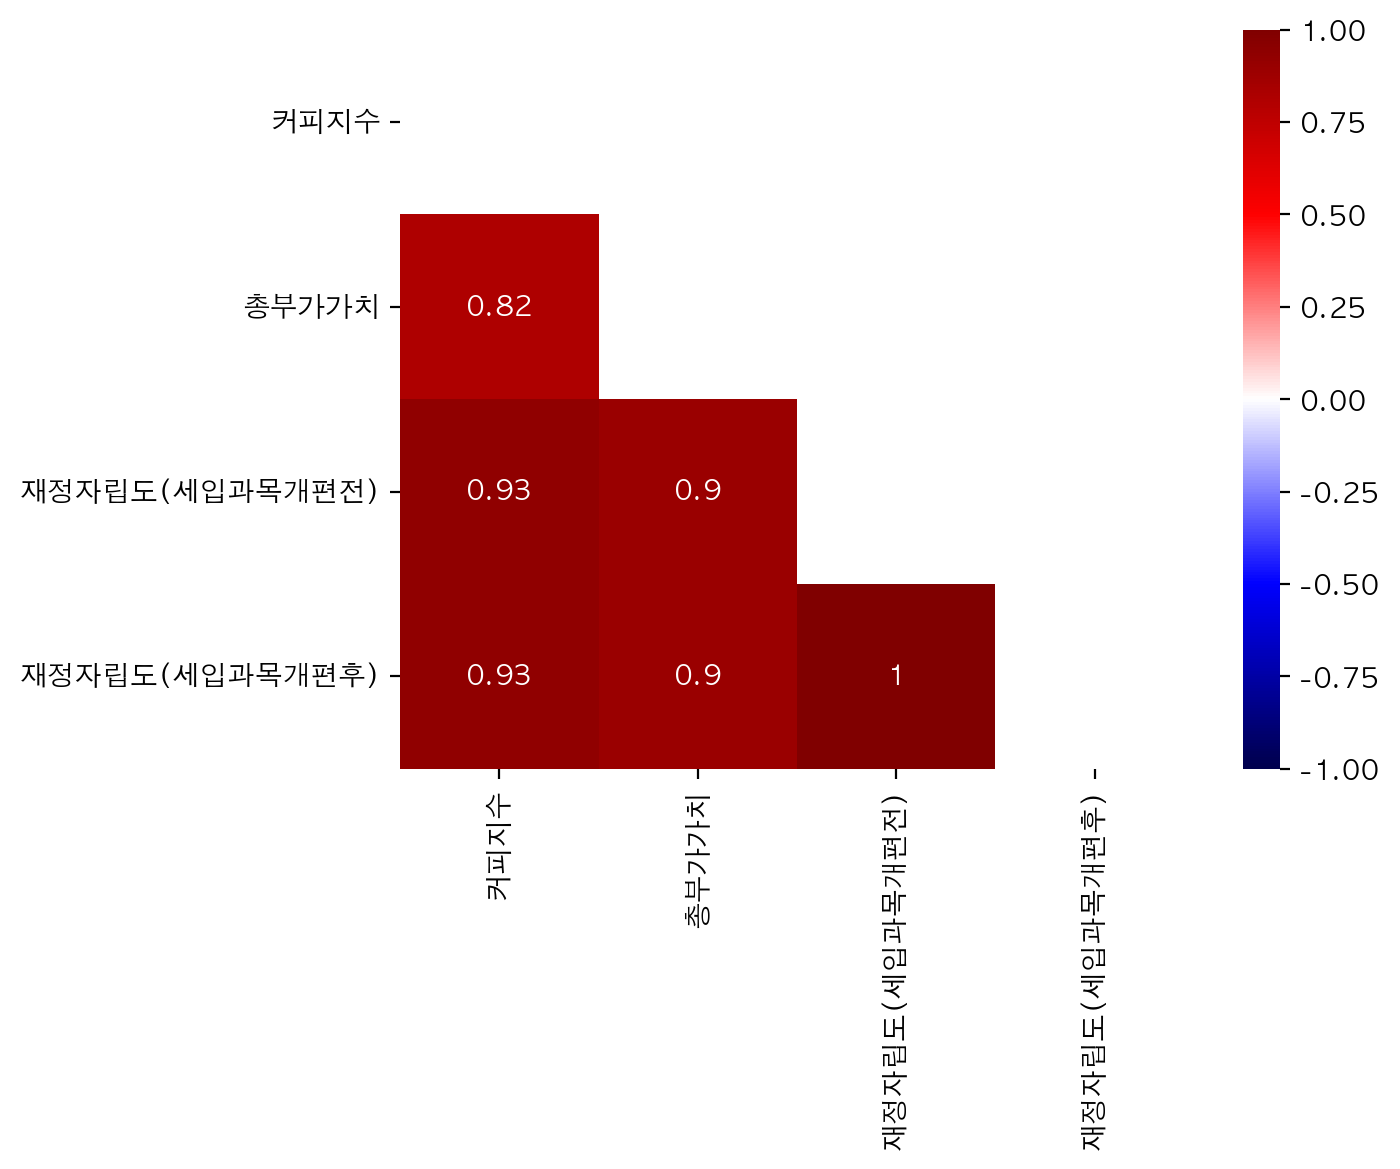

In [50]:
seoul_corr = mg_2.corr()

#mask처리
mask = np.triu(np.ones_like(seoul_corr))

#sns.heatmap()
sns.heatmap(seoul_corr, annot=True, cmap="seismic", vmin=-1, vmax=1, mask=mask);